In [2]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


IRIS

In [8]:
iris_data = sk.datasets.load_iris(as_frame=True)
species = iris_data.target_names
data  = iris_data.target


In [11]:
# Load the Iris dataset
iris_data = sk.datasets.load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the 'Species' column
iris_df['Species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# Extract the 'Species' column
species = iris_df['Species']

# Create a new DataFrame without the 'Species' column
df = iris_df.drop(columns=['Species'])

iris_df.head(), species.head(), df.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
   Species  
 0  setosa  
 1  setosa  
 2  setosa  
 3  setosa  
 4  setosa  ,
 0    setosa
 1    setosa
 2    setosa
 3    setosa
 4    setosa
 Name: Species, dtype: category
 Categories (3, object): ['setosa', 'versicolor', 'virginica'],
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2        

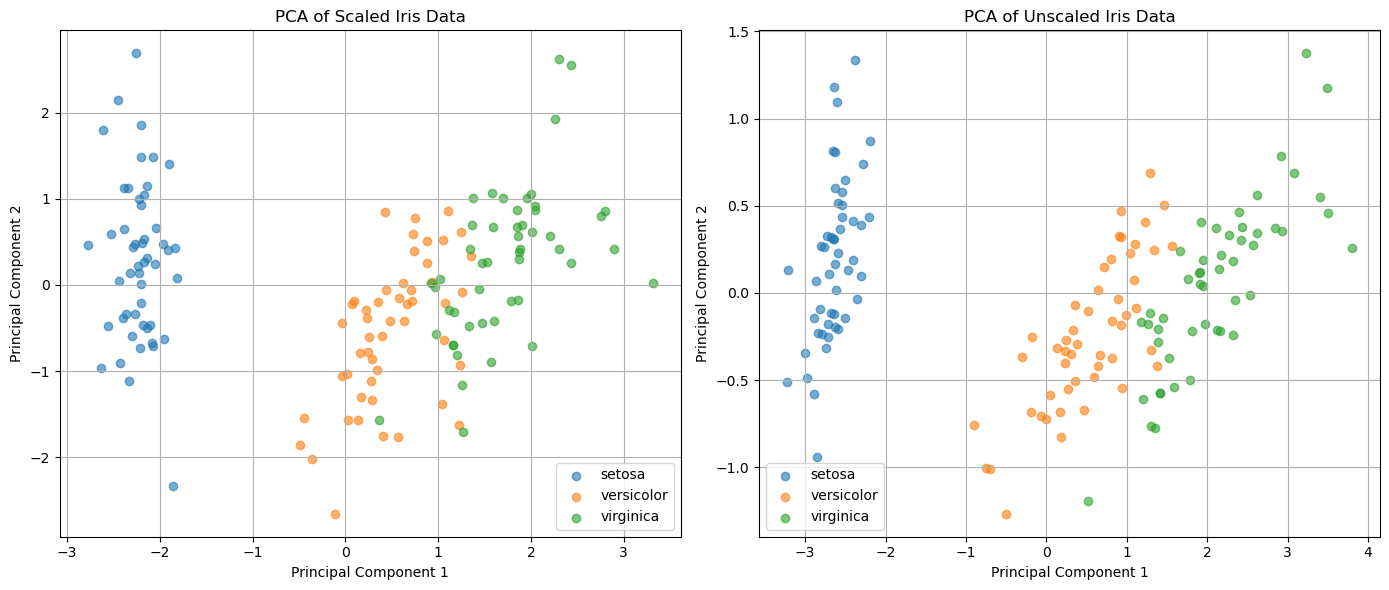

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target

# Step 2: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[iris.feature_names])

# Step 3: Perform PCA on scaled data
pca_scaled = PCA(n_components=2)
pca_result_scaled = pca_scaled.fit_transform(df_scaled)

# Step 4: Perform PCA on unscaled data
pca_unscaled = PCA(n_components=2)
pca_result_unscaled = pca_unscaled.fit_transform(df[iris.feature_names])

# Step 5: Create DataFrames with PCA results
pca_df_scaled = pd.DataFrame(data=pca_result_scaled, columns=['PC1', 'PC2'])
pca_df_scaled['Species'] = df['Species']

pca_df_unscaled = pd.DataFrame(data=pca_result_unscaled, columns=['PC1', 'PC2'])
pca_df_unscaled['Species'] = df['Species']

# Step 6: Visualize the PCA results side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot scaled data
for species in np.unique(iris.target):
    axes[0].scatter(pca_df_scaled[pca_df_scaled['Species'] == species]['PC1'],
                    pca_df_scaled[pca_df_scaled['Species'] == species]['PC2'],
                    label=iris.target_names[species], alpha=0.6)
axes[0].set_title('PCA of Scaled Iris Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()
axes[0].grid()

# Plot unscaled data
for species in np.unique(iris.target):
    axes[1].scatter(pca_df_unscaled[pca_df_unscaled['Species'] == species]['PC1'],
                    pca_df_unscaled[pca_df_unscaled['Species'] == species]['PC2'],
                    label=iris.target_names[species], alpha=0.6)
axes[1].set_title('PCA of Unscaled Iris Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


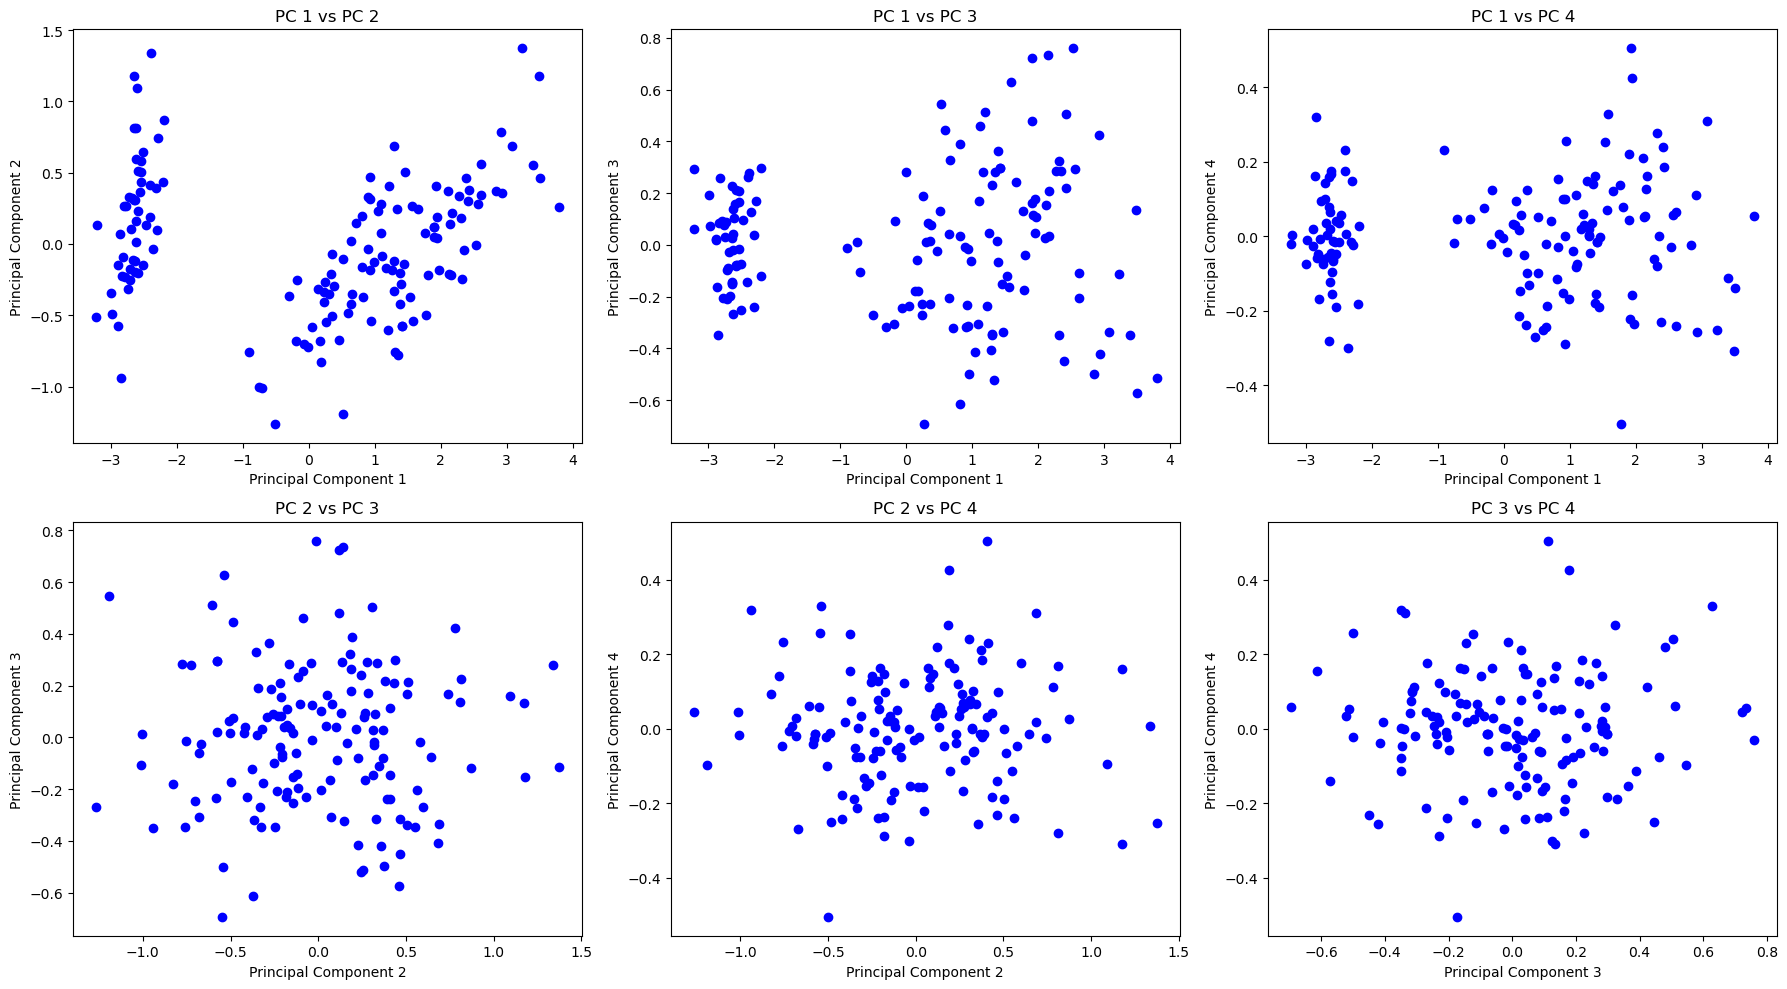

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import itertools

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df)

# Create a single figure for every combination of the principal components
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each combination of principal components
for ax, (x, y) in zip(axes, itertools.combinations(range(4), 2)):
    ax.scatter(pca_result[:, x], pca_result[:, y], c='blue', marker='o')
    ax.set_xlabel(f'Principal Component {x + 1}')
    ax.set_ylabel(f'Principal Component {y + 1}')
    ax.set_title(f'PC {x + 1} vs PC {y + 1}')

plt.tight_layout()
plt.show()


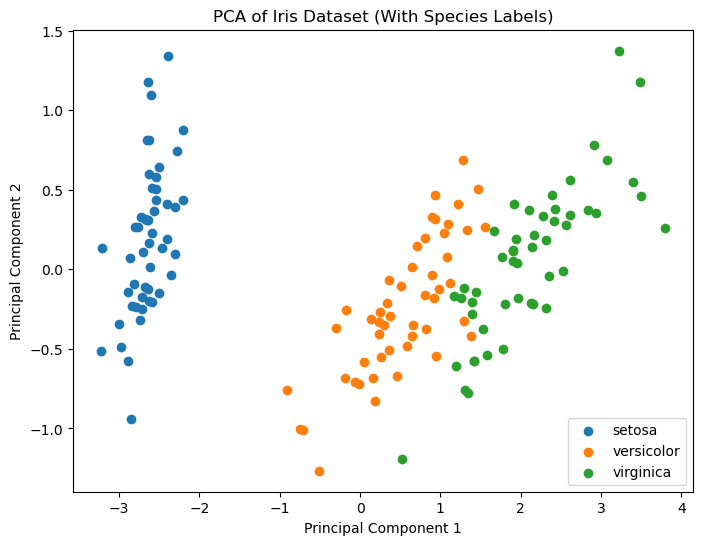

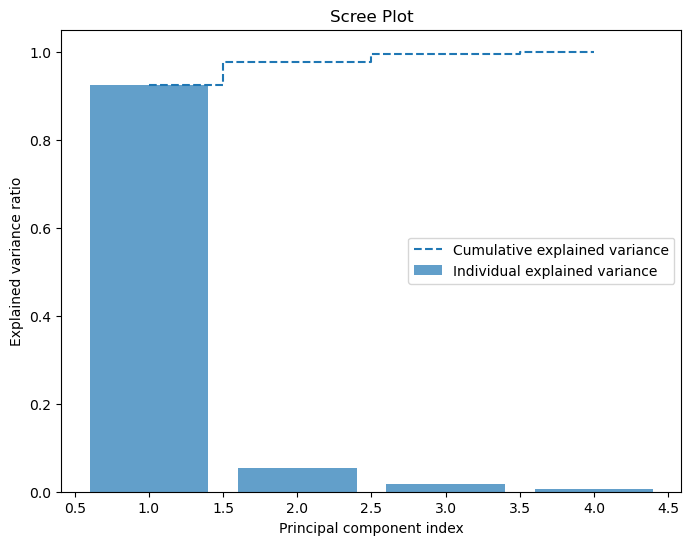

In [15]:
# Plot the principal components with species labels
plt.figure(figsize=(8, 6))
for species_name in species.cat.categories:
    plt.scatter(pca_result[species == species_name, 0],
                pca_result[species == species_name, 1],
                label=species_name)
plt.title('PCA of Iris Dataset (With Species Labels)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(np.cumsum(pca.explained_variance_ratio_)) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', linestyle='--', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

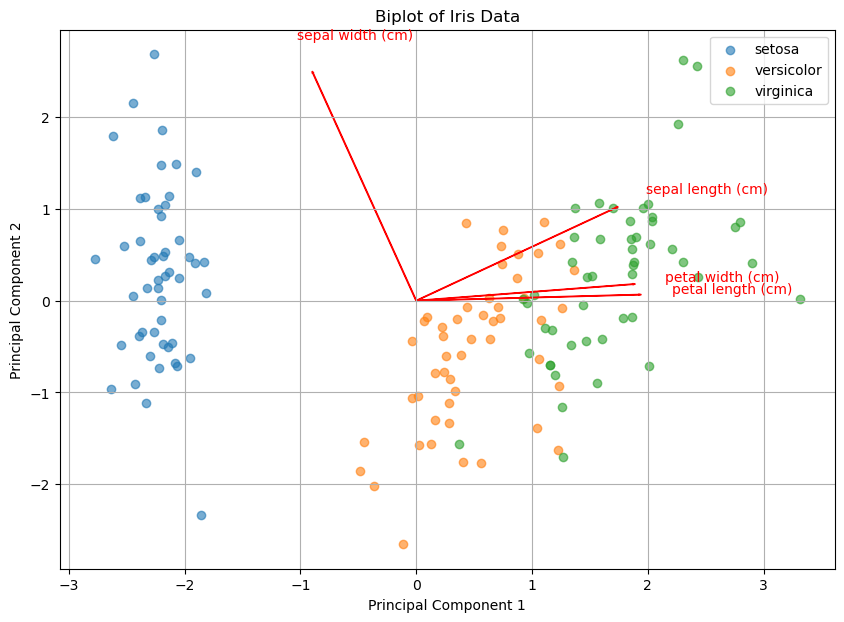

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Step 2: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Step 4: Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Species'] = iris.target

# Step 5: Create the biplot
plt.figure(figsize=(10, 7))

# Plot the principal components
for species in np.unique(iris.target):
    plt.scatter(pca_df[pca_df['Species'] == species]['PC1'],
                pca_df[pca_df['Species'] == species]['PC2'],
                label=iris.target_names[species], alpha=0.6)

# Plot the feature vectors
for i, feature in enumerate(iris.feature_names):
    plt.arrow(0, 0, pca.components_[0, i] * max(pca_result[:, 0]),
              pca.components_[1, i] * max(pca_result[:, 1]), color='r', width=0.005)
    plt.text(pca.components_[0, i] * max(pca_result[:, 0]) * 1.15,
             pca.components_[1, i] * max(pca_result[:, 1]) * 1.15, feature, color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of Iris Data')
plt.legend()
plt.grid()
plt.show()


CHIMP

/tmp/ipykernel_74330/3477870779.py:8: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



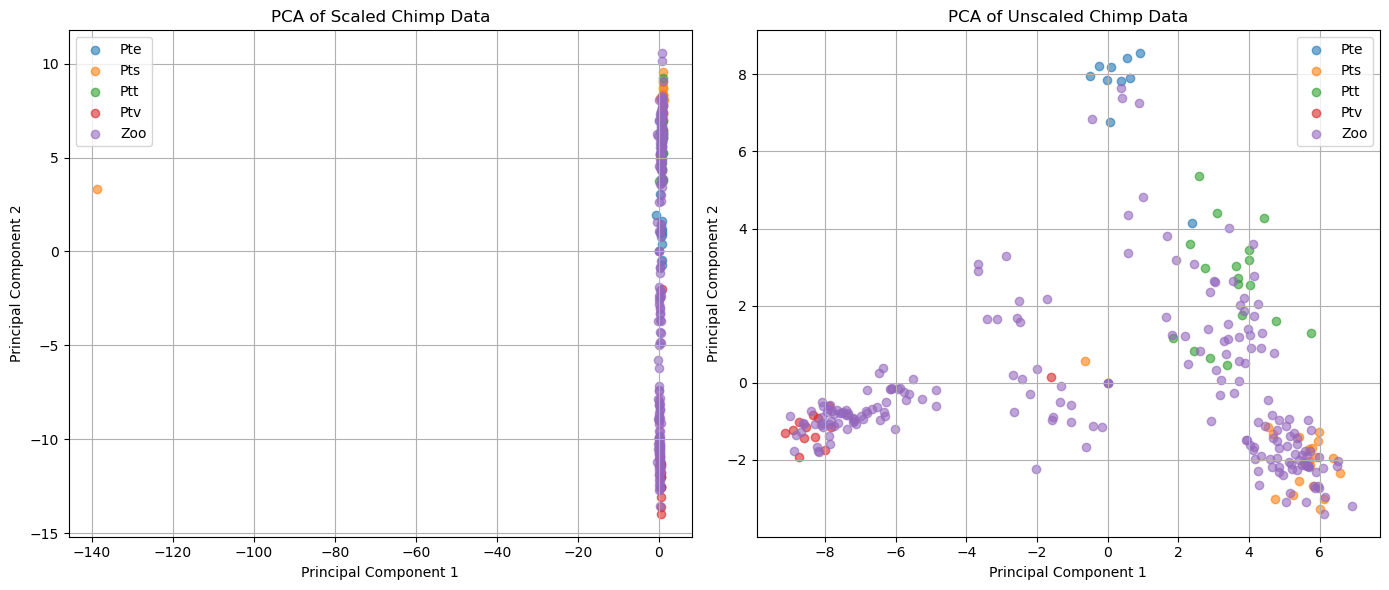

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Read the data from the file
chimp_data = pd.read_csv("ChimpFirst500SNPs.data", delim_whitespace=True, header=None)

# Step 2: Replace missing values (represented as '.') with NaN and convert to numeric
chimp_data = chimp_data.replace('.', np.nan).apply(pd.to_numeric)

# Step 3: Impute missing data using the mean
chimp_data_imputed = chimp_data.fillna(chimp_data.mean())

# Step 4: Standardize the data
scaler = StandardScaler()
chimp_data_scaled = scaler.fit_transform(chimp_data_imputed)

# Step 5: Perform PCA on scaled data
pca_scaled = PCA(n_components=2)
pca_result_scaled = pca_scaled.fit_transform(chimp_data_scaled)

# Step 6: Perform PCA on unscaled data
pca_unscaled = PCA(n_components=2)
pca_result_unscaled = pca_unscaled.fit_transform(chimp_data_imputed)

# Step 7: Read class labels from the file
chimp_names = pd.read_csv("SpeciesNames.data", header=None).values.flatten()

# Step 8: Create DataFrames with PCA results and class labels
pca_df_scaled = pd.DataFrame(data=pca_result_scaled, columns=['PC1', 'PC2'])
pca_df_scaled['Species'] = chimp_names

pca_df_unscaled = pd.DataFrame(data=pca_result_unscaled, columns=['PC1', 'PC2'])
pca_df_unscaled['Species'] = chimp_names

# Step 9: Visualize the PCA results side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot scaled data
for species in np.unique(chimp_names):
    axes[0].scatter(pca_df_scaled[pca_df_scaled['Species'] == species]['PC1'],
                    pca_df_scaled[pca_df_scaled['Species'] == species]['PC2'],
                    label=species, alpha=0.6)
axes[0].set_title('PCA of Scaled Chimp Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()
axes[0].grid()

# Plot unscaled data
for species in np.unique(chimp_names):
    axes[1].scatter(pca_df_unscaled[pca_df_unscaled['Species'] == species]['PC1'],
                    pca_df_unscaled[pca_df_unscaled['Species'] == species]['PC2'],
                    label=species, alpha=0.6)
axes[1].set_title('PCA of Unscaled Chimp Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Read the data from the file
chimp_data = pd.read_csv("ChimpFirst500SNPs.data", delim_whitespace=True, header=None)

# Step 2: Replace missing values (represented as '.') with NaN and convert to numeric
chimp_data = chimp_data.replace('.', np.nan).apply(pd.to_numeric)

# Step 3: Impute missing data using the mean
chimp_data_imputed = chimp_data.fillna(chimp_data.mean())

# Step 4: Standardize the data
scaler = StandardScaler()
chimp_data_scaled = scaler.fit_transform(chimp_data_imputed)

# Step 5: Perform PCA on scaled data
pca_scaled = PCA(n_components=2)
pca_result_scaled = pca_scaled.fit_transform(chimp_data_scaled)

# Step 6: Create a DataFrame with PCA results
pca_df_scaled = pd.DataFrame(data=pca_result_scaled, columns=['PC1', 'PC2'], index=chimp_data_imputed.index)

# Step 7: Identify the outlier in PC1
outlier_index = pca_df_scaled['PC1'].abs().idxmax()

# Step 8: Calculate summary statistics for the outlier data
outlier_data = chimp_data_imputed.loc[outlier_index]
summary_stats = outlier_data.describe()

# Step 9: Print the summary statistics
print(f"Summary Statistics for Outlier at Index {outlier_index}:")
print(summary_stats)


/tmp/ipykernel_74330/2958115139.py:7: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



Summary Statistics for Outlier at Index 226:
count    500.000000
mean       1.049948
std        0.869671
min        0.000000
25%        0.030734
50%        1.141424
75%        1.976577
max        2.000000
Name: 226, dtype: float64


In [23]:
chimp_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,230.000000,260.000000,261.000000,260.000000,261.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,231.000000,233.000000,234.000000,230.000000,185.000000,192.000000,185.000000,184.000000,178.000000,199.000000
mean,0.082609,0.026923,1.954023,1.988462,1.800766,1.011364,0.700758,1.780303,1.958333,0.875000,...,0.060606,0.596567,1.846154,1.973913,0.021622,1.692708,0.016216,0.010870,1.932584,0.944724
std,0.275890,0.162171,0.209838,0.138461,0.400192,0.238547,0.458796,0.414828,0.200206,0.331347,...,0.288561,0.809633,0.416719,0.159742,0.179273,0.564526,0.126649,0.103972,0.272994,0.922206
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000
75%,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000


/tmp/ipykernel_74330/1838888904.py:8: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



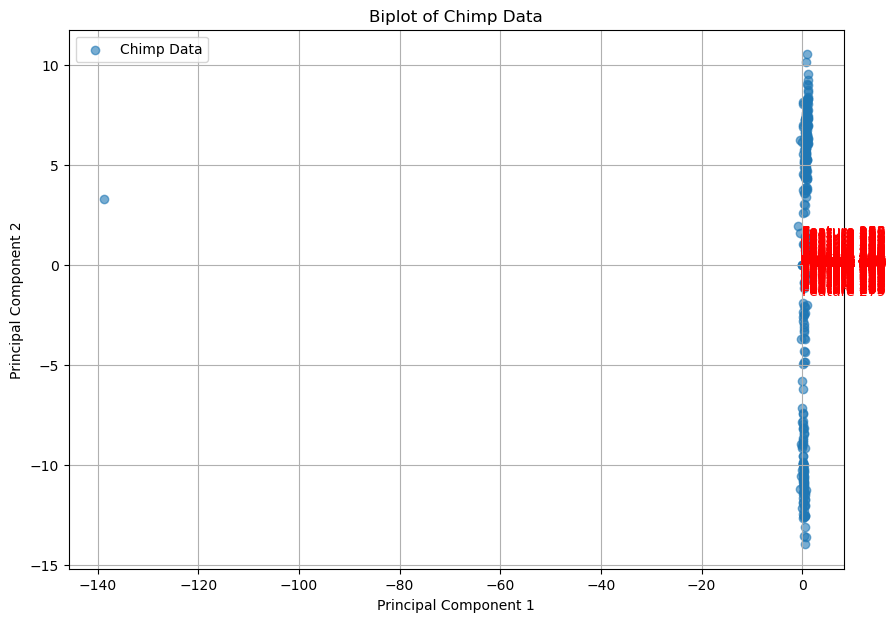

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Read the data from the file
chimp_data = pd.read_csv("ChimpFirst500SNPs.data", delim_whitespace=True, header=None)

# Step 2: Replace missing values (represented as '.') with NaN
chimp_data = chimp_data.replace('.', np.nan).apply(pd.to_numeric)

# Step 3: Impute missing data using the mean
chimp_data_imputed_mean = chimp_data.fillna(chimp_data.mean())

# Step 4: Standardize the data
scaler = StandardScaler()
chimp_data_scaled = scaler.fit_transform(chimp_data_imputed_mean)

# Step 5: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(chimp_data_scaled)

# Step 6: Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 7: Create the biplot
plt.figure(figsize=(10, 7))

# Plot the principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, label='Chimp Data')

# Plot the feature vectors
for i in range(chimp_data.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i] * max(pca_result[:, 0]),
              pca.components_[1, i] * max(pca_result[:, 1]), color='r', width=0.005)
    plt.text(pca.components_[0, i] * max(pca_result[:, 0]) * 1.15,
             pca.components_[1, i] * max(pca_result[:, 1]) * 1.15, f'Feature {i+1}', color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of Chimp Data')
plt.legend()
plt.grid()
plt.show()


# I LIKE TURTLES

/tmp/ipykernel_52621/2772324094.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  turtles = pd.read_csv("PaintedTurtles.txt", delim_whitespace=True)


Correlation Matrix:
           length     width    height
length  1.000000  0.978312  0.964695
width   0.978312  1.000000  0.960571
height  0.964695  0.960571  1.000000


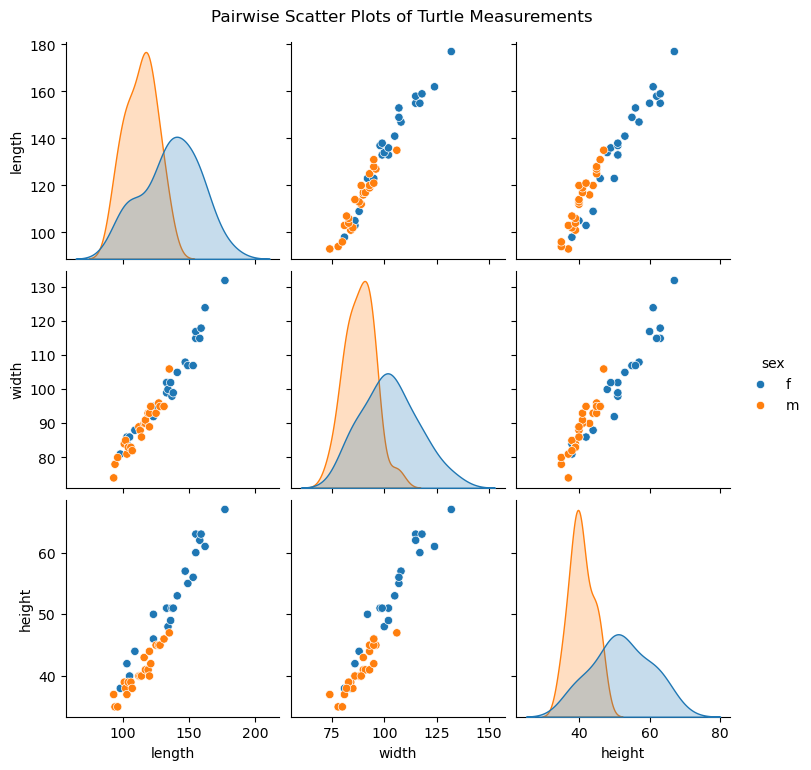

Sum of squares of loading coefficients (VT): 3.0000000000000013


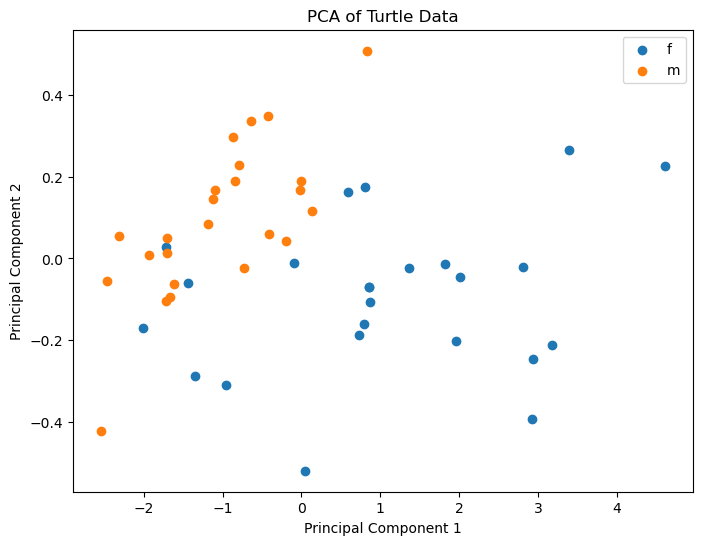

Manual PCs:
 [[-2.00466025e+00 -1.68921347e-01]
 [-1.72362844e+00  2.68985249e-02]
 [-1.35439901e+00 -2.87480600e-01]
 [-1.43581697e+00 -5.96720252e-02]
 [-9.52353680e-01 -3.09902486e-01]
 [ 4.73888072e-02 -5.18406169e-01]
 [-9.14414833e-02 -1.13036416e-02]
 [ 7.24799696e-01 -1.86088867e-01]
 [ 8.63039174e-01 -7.04548258e-02]
 [ 8.63039174e-01 -7.04548258e-02]
 [ 5.91635662e-01  1.62094344e-01]
 [ 8.10179689e-01  1.73390916e-01]
 [ 7.92953735e-01 -1.60484883e-01]
 [ 8.67592028e-01 -1.05903037e-01]
 [ 1.36828127e+00 -2.22576991e-02]
 [ 1.95494131e+00 -2.01869148e-01]
 [ 1.82744354e+00 -1.26052528e-02]
 [ 2.01094484e+00 -4.63237101e-02]
 [ 2.92157248e+00 -3.90961785e-01]
 [ 2.80592980e+00 -2.02710601e-02]
 [ 2.93798044e+00 -2.44983166e-01]
 [ 3.17404582e+00 -2.11179080e-01]
 [ 3.39766529e+00  2.63934744e-01]
 [ 4.61028555e+00  2.25646949e-01]
 [-2.53927880e+00 -4.21052818e-01]
 [-2.46493592e+00 -5.51026875e-02]
 [-2.31565933e+00  5.40610055e-02]
 [-1.71147793e+00 -1.03042929e-01]
 [-1.70

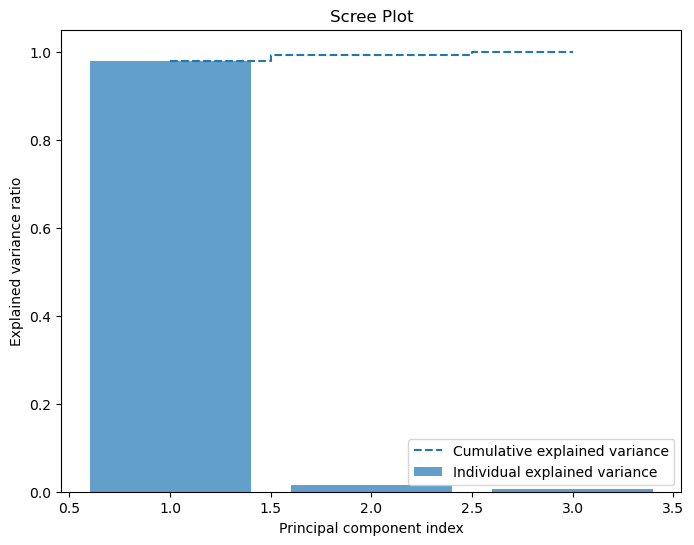

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Step 1: Read the data from the file
turtles = pd.read_csv("PaintedTurtles.txt", delim_whitespace=True)

# Step 2: Calculate the correlation between the numeric variables
correlation_matrix = turtles[['length', 'width', 'height']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Step 3: Compute scatter plots for all pairs of variables
sns.pairplot(turtles, hue='sex', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots of Turtle Measurements', y=1.02)
plt.show()

# Step 4: Scale the variables
scaler = StandardScaler()
turtles_scaled = scaler.fit_transform(turtles[['length', 'width', 'height']])

# Step 5: Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(turtles_scaled, full_matrices=False)

# Check if the square of the loading coefficients sum to one
print("Sum of squares of loading coefficients (VT):", np.sum(VT**2))

# Step 6: Calculate the PCs manually
PCs = turtles_scaled @ VT.T

# Step 7: Plot PC1 and PC2, colored by sex
plt.figure(figsize=(8, 6))
for sex_type in turtles['sex'].unique():
    plt.scatter(PCs[turtles['sex'] == sex_type, 0],
                PCs[turtles['sex'] == sex_type, 1],
                label=sex_type)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Turtle Data')
plt.legend()
plt.show()

# Step 8: Compute the PCs using PCA and compare with the manual results
pca = PCA()
pca_result = pca.fit_transform(turtles_scaled)

# Compare the results
print("Manual PCs:\n", PCs[:, :2])
print("PCA PCs:\n", pca_result[:, :2])

# Step 9: Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(np.cumsum(pca.explained_variance_ratio_)) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', linestyle='--', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()


In [11]:
import pandas as pd
import numpy as np
import plotly.express as px

# Step 1: Read the data from the file using read_table
df = pd.read_table("swissroll.dat", delim_whitespace=True, header=None, names=['V1', 'V2', 'V3'])

# Step 2: Assign labels correctly
# Repeat each label 400 times sequentially
labels = np.repeat(["1", "2", "3", "4"], 400)
df['label'] = labels

# Step 3: Verify the data and labels
print(df.head(20))  # Check the first few rows to ensure labels are correct

# Step 4: Create a 3D scatter plot using Plotly with correct labels and colors
fig = px.scatter_3d(df, x='V1', y='V2', z='V3', color='label',
                    labels={'V1': 'V1', 'V2': 'V2', 'V3': 'V3'},
                    title='3D Plot of Swiss Roll Data',
                    color_discrete_map={"1": "hotpink", "2": "green", "3": "blue", "4": "purple"})

# Step 5: Customize the layout to match the R example
fig.update_layout(scene=dict(
    xaxis_title='V1',
    yaxis_title='V2',
    zaxis_title='V3'
))

# Show the plot
fig.show()


          V1         V2        V3 label
0  -5.214647   7.087974  6.729247     1
1  -0.421762   8.426638  7.896089     1
2  -6.134601   5.686436  6.088567     1
3   6.212569   8.307839  2.362335     1
4   6.344603   7.664955  0.532386     1
5   0.098673   6.992156  7.840777     1
6   2.261138   8.088781  7.203263     1
7   6.319323   6.770813  1.717501     1
8   3.039391   6.589591  6.782867     1
9   5.188841   7.283918 -2.624659     1
10 -2.593684   7.969614  7.754495     1
11  0.757685   7.698148  7.719040     1
12 -2.493988   7.895625  7.774168     1
13 -6.348292   9.235869  5.912167     1
14  5.811158   8.661124  3.604759     1
15  5.084188   9.415847  4.881474     1
16  3.233400  10.133548  6.658328     1
17 -2.671727   5.834501  7.738187     1
18 -5.586962   6.801060  6.491443     1
19 -0.300033   7.474045  7.886303     1


/tmp/ipykernel_74330/1850062736.py:6: FutureWarning:

The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



/tmp/ipykernel_74330/4229363242.py:8: FutureWarning:

The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



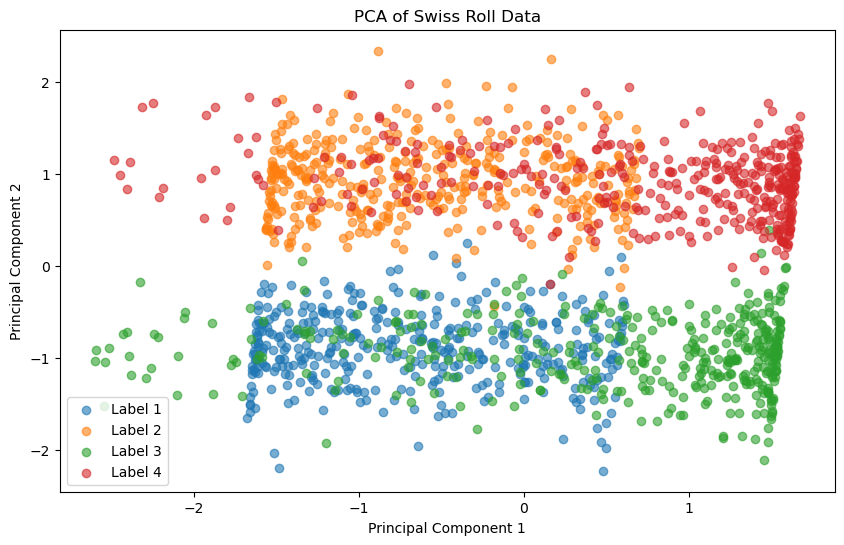

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Read the data from the file using read_table
df = pd.read_table("swissroll.dat", delim_whitespace=True, header=None, names=['V1', 'V2', 'V3'])

# Step 2: Assign labels correctly
labels = np.repeat(["1", "2", "3", "4"], 400)
df['label'] = labels

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['V1', 'V2', 'V3']])

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(df_scaled)

# Step 5: Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = labels

# Step 6: Visualize the PCA results
plt.figure(figsize=(10, 6))
for label in pca_df['label'].unique():
    plt.scatter(pca_df[pca_df['label'] == label]['PC1'],
                pca_df[pca_df['label'] == label]['PC2'],
                label=f'Label {label}', alpha=0.6)

plt.title('PCA of Swiss Roll Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
